In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [ ]:
df=pd.read_csv("Combined Dataset.csv")
df= df.rename({'Estimated Time': 'Estimated Time (Days)', 'Delay (days)': 'Delay (Days)'}, axis=1)
df

In [4]:
df.describe()

,Estimated Time (Days),Delay (Days)
count,100.00000,100.000000
mean,4.46000,2.530000
std,2.30248,1.533827
min,1.00000,0.000000
25%,2.75000,1.000000
50%,4.50000,2.500000
75%,6.00000,4.000000
max,8.00000,5.000000


In [5]:
df.shape

(100, 10)

In [6]:
df.columns

Index(['Task ID', 'Task Description', 'Assigned To', 'Priority',
       'Dependencies', 'Assigned Date', 'Expected Deadline',
       'Estimated Time (Days)', 'Completed Date', 'Delay (Days)'],
      dtype='object')

In [7]:
for c in df.columns[2:4]:
    print(c,df[c].unique())
    print("-"*50)

Assigned To ['Charlie' 'Eve' 'David' 'Bob' 'Alice']
--------------------------------------------------
Priority ['High' 'Medium' 'Low' 'Urgent']
--------------------------------------------------


In [8]:
df.isna().sum()

Task ID                  0
Task Description         0
Assigned To              0
Priority                 0
Dependencies             0
Assigned Date            0
Expected Deadline        0
Estimated Time (Days)    0
Completed Date           0
Delay (Days)             0
dtype: int64

In [9]:
tm_count = df['Assigned To'].value_counts().reset_index() 
tm_count.columns = ['Team Members','Task Count'] 
tm_count

,Team Members,Task Count
0,Eve,35
1,Alice,21
2,Charlie,18
3,David,13
4,Bob,13


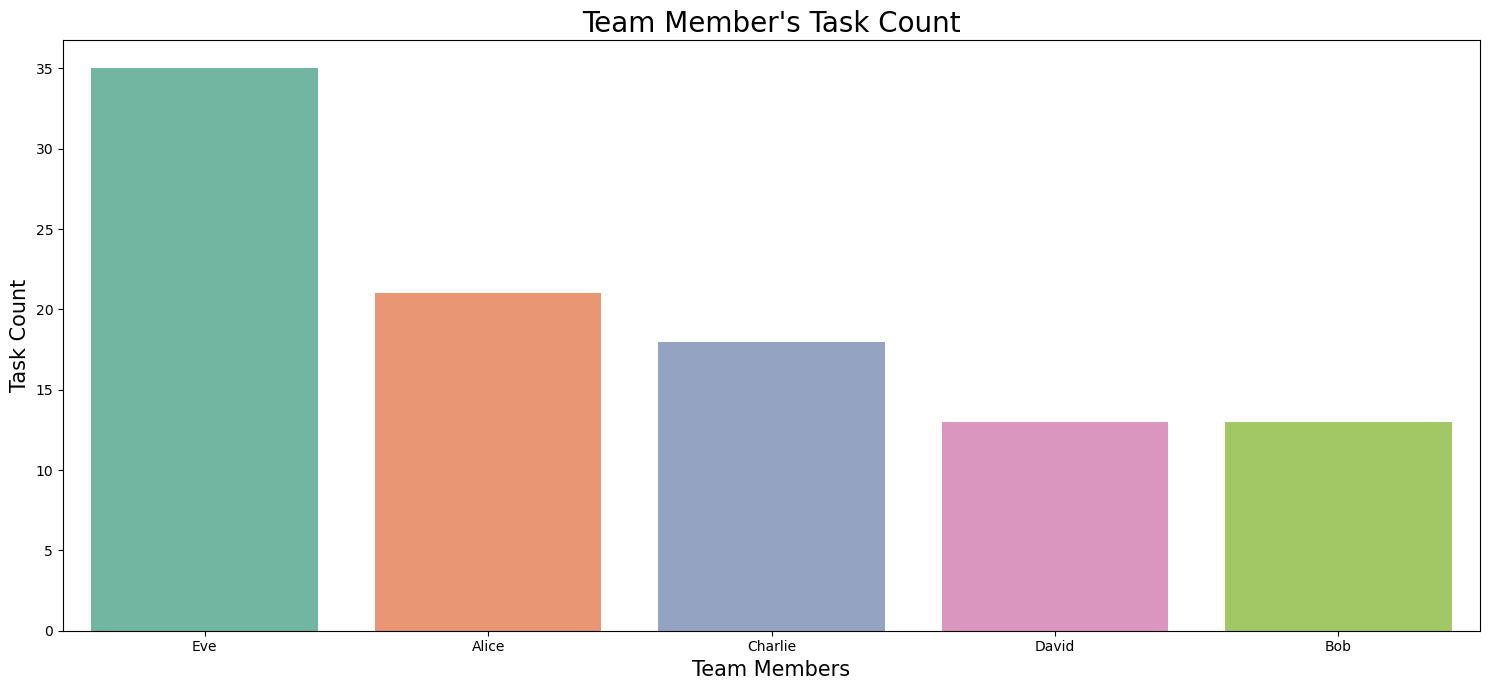

In [10]:
plt.figure(figsize=(15,7)) 
ax=sns.barplot(x="Team Members", y='Task Count', data=tm_count, palette='Set2') 
ax.set_title("Team Member's Task Count", fontsize=20) 
ax.set_xlabel("Team Members", fontsize=15) 
ax.set_ylabel('Task Count', fontsize=15)
plt.tight_layout()
plt.show()

In [11]:
priority_count = df['Priority'].value_counts().reset_index() 
priority_count.columns = ['Priority','Count'] 
priority_count

,Priority,Count
0,High,33
1,Medium,23
2,Urgent,23
3,Low,21


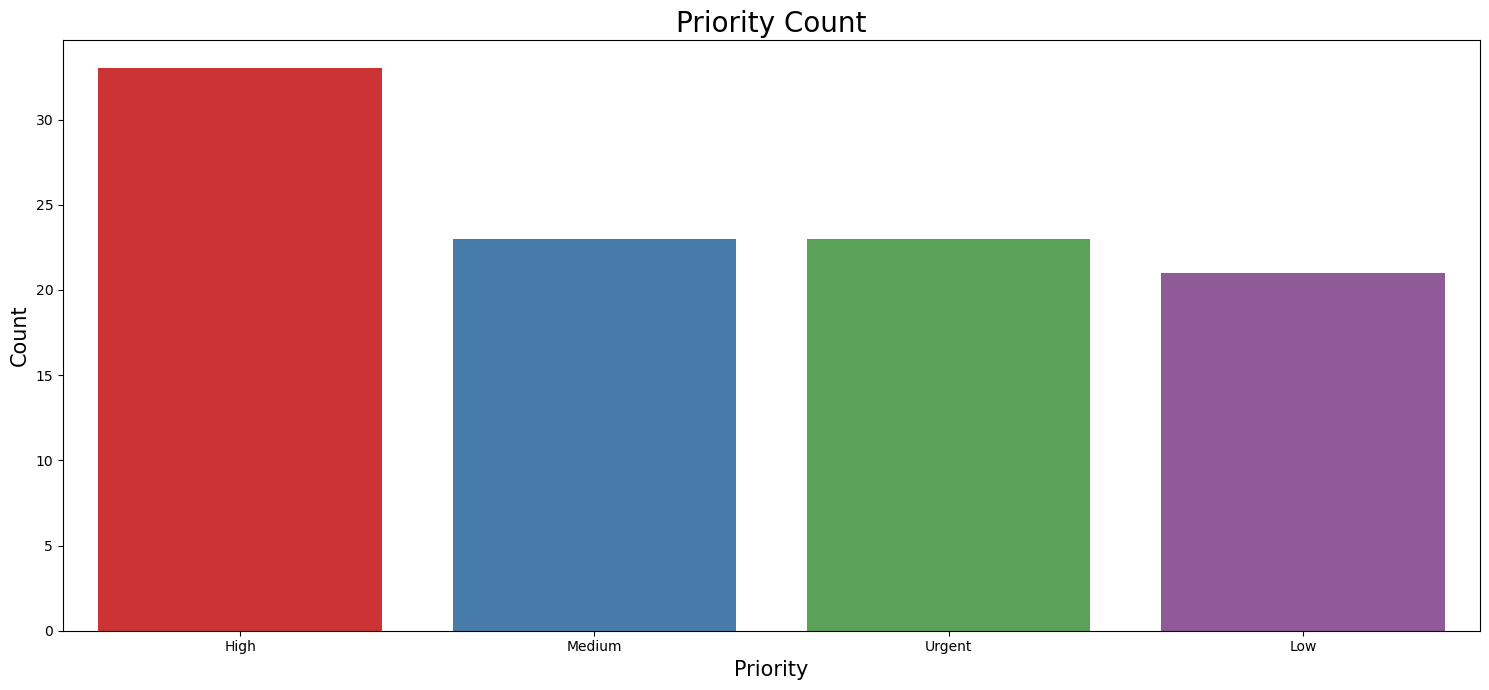

In [12]:
plt.figure(figsize=(15,7)) 
ax=sns.barplot(x="Priority", y='Count', data=priority_count, palette='Set1') 
ax.set_title("Priority Count", fontsize=20) 
ax.set_xlabel("Priority", fontsize=15) 
ax.set_ylabel('Count', fontsize=15)
plt.tight_layout()
plt.show()

In [13]:
def preprocess(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower().strip())  
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words and len(word) > 1]
    return ' '.join(words)

In [14]:
df["Preprocessed Task"]=df["Task Description"].apply(preprocess)
df

,Task ID,Task Description,Assigned To,Priority,Dependencies,Assigned Date,Expected Deadline,Estimated Time (Days),Completed Date,Delay (Days),Preprocessed Task
0,T1,Fix critical security vulnerability in system,Charlie,High,No Dependency,1/23/2024,1/30/2024,7,1/30/2024,0,fix critical security vulnerability system
1,T2,Prepare financial report for Q1,Eve,Medium,T1,1/11/2024,1/15/2024,4,1/18/2024,3,prepare financial report
2,T3,Schedule and conduct weekly team meeting,David,High,No Dependency,1/9/2024,1/11/2024,2,1/13/2024,2,schedule conduct weekly team meeting
3,T4,Submit project proposal before deadline,Bob,Medium,T1,1/14/2024,1/22/2024,8,1/22/2024,0,submit project proposal deadline
4,T5,Review design documents and provide feedback,Charlie,Low,No Dependency,1/12/2024,1/13/2024,1,1/18/2024,5,review design document provide feedback
...,...,...,...,...,...,...,...,...,...,...,...
95,T96,Train new employees on company policies and pr...,Bob,High,T95,1/27/2024,2/2/2024,6,2/4/2024,2,train new employee company policy procedure
96,T97,Coordinate with vendors for procurement needs,Eve,High,T48,1/11/2024,1/19/2024,8,1/24/2024,5,coordinate vendor procurement need
97,T98,Create social media marketing strategy,Alice,Low,No Dependency,1/31/2024,2/5/2024,5,2/10/2024,5,create social medium marketing strategy
98,T99,Implement new security patches in infrastructure,Eve,Medium,No Dependency,1/24/2024,1/25/2024,1,1/29/2024,4,implement new security patch infrastructure


In [15]:
priority_order = ["Low", "Medium", "High", "Urgent"]

# Convert to categorical with the defined order
df["Encoded Priority"] = pd.Categorical(df["Priority"], categories=priority_order, ordered=True).codes

df

,Task ID,Task Description,Assigned To,Priority,Dependencies,Assigned Date,Expected Deadline,Estimated Time (Days),Completed Date,Delay (Days),Preprocessed Task,Encoded Priority
0,T1,Fix critical security vulnerability in system,Charlie,High,No Dependency,1/23/2024,1/30/2024,7,1/30/2024,0,fix critical security vulnerability system,2
1,T2,Prepare financial report for Q1,Eve,Medium,T1,1/11/2024,1/15/2024,4,1/18/2024,3,prepare financial report,1
2,T3,Schedule and conduct weekly team meeting,David,High,No Dependency,1/9/2024,1/11/2024,2,1/13/2024,2,schedule conduct weekly team meeting,2
3,T4,Submit project proposal before deadline,Bob,Medium,T1,1/14/2024,1/22/2024,8,1/22/2024,0,submit project proposal deadline,1
4,T5,Review design documents and provide feedback,Charlie,Low,No Dependency,1/12/2024,1/13/2024,1,1/18/2024,5,review design document provide feedback,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,T96,Train new employees on company policies and pr...,Bob,High,T95,1/27/2024,2/2/2024,6,2/4/2024,2,train new employee company policy procedure,2
96,T97,Coordinate with vendors for procurement needs,Eve,High,T48,1/11/2024,1/19/2024,8,1/24/2024,5,coordinate vendor procurement need,2
97,T98,Create social media marketing strategy,Alice,Low,No Dependency,1/31/2024,2/5/2024,5,2/10/2024,5,create social medium marketing strategy,0
98,T99,Implement new security patches in infrastructure,Eve,Medium,No Dependency,1/24/2024,1/25/2024,1,1/29/2024,4,implement new security patch infrastructure,1


In [16]:
tfidf=TfidfVectorizer(max_features=1000,min_df=5)
tfidf

TfidfVectorizer(max_features=1000, min_df=5)

In [17]:
#Feature and Target
x=tfidf.fit_transform(df["Preprocessed Task"]).toarray()
y=df["Encoded Priority"]

In [18]:
#Importance of each word in percentage

x_tfidf_df=pd.DataFrame(x,columns=tfidf.get_feature_names_out())
x_tfidf_df

,address,analysis,analyze,automated,better,bug,cicd,code,company,complaint,...,test,train,upcoming,update,user,vendor,vulnerability,website,weekly,write
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.46087,0.0,0.00000,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.00000,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.46087,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.00000,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.370431,0.0,...,0.0,0.440221,0.0,0.0,0.0,0.0,0.00000,0.0,0.00000,0.0
96,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.5,0.00000,0.0,0.00000,0.0
97,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.00000,0.0
98,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.00000,0.0


In [19]:
print(f"Processed data shape: {x.shape}")

Processed data shape: (100, 90)


In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.41855795, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.51930967],
       [0.        , 0.40824829, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [21]:
#Implementing the Models for Prediction
#1. Random Forest Classifier

model=RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)

RandomForestClassifier()

In [22]:
prediction=model.predict(x_test)
prediction

array([1, 0, 2, 3, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 3, 0, 3, 1],
      dtype=int8)

In [23]:
pred_mnb=[priority_order[value] for value in prediction]
pred_mnb

['Medium',
 'Low',
 'High',
 'Urgent',
 'Low',
 'Low',
 'High',
 'High',
 'High',
 'High',
 'Low',
 'High',
 'Low',
 'Low',
 'High',
 'Low',
 'Urgent',
 'Low',
 'Urgent',
 'Medium']

In [24]:
cm=confusion_matrix(y_test,prediction)
cr=classification_report(y_test,prediction)
print(cm)
print("-"*50)
print(cr)

[[4 0 2 0]
 [1 1 1 1]
 [3 0 1 2]
 [0 1 3 0]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.50      0.25      0.33         4
           2       0.14      0.17      0.15         6
           3       0.00      0.00      0.00         4

    accuracy                           0.30        20
   macro avg       0.29      0.27      0.26        20
weighted avg       0.29      0.30      0.28        20



Text(195.72222222222223, 0.5, 'Actual')

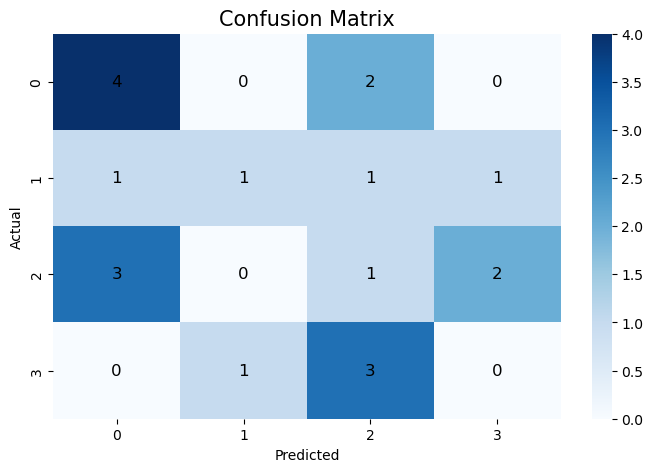

In [25]:
plt.figure(figsize=(18, 5))
plt.subplot(1,2,1)
ax=sns.heatmap(cm, annot=False, fmt='d', cmap='Blues')
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j + 0.5, i + 0.5, str(cm[i, j]), ha='center', va='center', size=12, color='Black')
        
plt.title('Confusion Matrix',fontsize=15)
plt.xlabel('Predicted',fontsize=10)
plt.ylabel('Actual',fontsize=10)

In [26]:
acc=accuracy_score(y_test,prediction)
acc

0.3